### Importing the necesasry libraries

In [2]:
import pandas as pd
import numpy as np

### Reading the csv file

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df.head(5)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


### Here I found that I have a total of 16857 rows and 29 columns

In [5]:
df.shape

(16857, 29)

### I checked the total columns in the dataset and how they are named

In [6]:
df.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

### Here I am checking the data types of different columns. I found that 4 columns have object data types but in reality they should be numeric columns. So there is some kind of discrepancy here

In [7]:
df.dtypes

timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


### Here i am checking the unique values present in the target variable column. I find that it has 4 string values, because of which the entire column is having object data type

In [8]:
df['equipment_energy_consumption'].unique()

array(['60.0', '50.0', nan, '70.0', '230.0', '580.0', '430.0', '250.0',
       '100.0', '90.0', '80.0', '140.0', '120.0', '190.0', '110.0',
       '400.0', '390.0', '240.0', '40.0', '30.0', '310.0', '380.0',
       '370.0', '20.0', '-110.0', '260.0', '500.0', '450.0', '220.0',
       '170.0', '290.0', '130.0', '200.0', '210.0', '-50.0', '-20.0',
       '-944.5664110012307', '350.0', '300.0', '-400.0', '340.0', '150.0',
       '330.0', '420.0', '520.0', '360.0', '-270.0', '-30.0', '180.0',
       '550.0', '690.0', '620.0', '610.0', '490.0', '410.0', '320.0',
       '270.0', '740.0', '910.0', '510.0', '790.0', '1139.9856929495108',
       '-40.0', 'error', '460.0', '160.0', '480.0', '280.0', '-220.0',
       '560.0', '1080.0', '750.0', '???', '470.0', '440.0', '-80.0',
       '800.0', '-790.0', '540.0', '530.0', 'check', '660.0', '630.0',
       '600.0', '10.0', '570.0', '830.0', '1070.0', '890.0', '590.0',
       '-1139.9856929495108', '850.0', '710.0', '680.0', '-120.0',
       '-310.0

In [9]:
# ## find the min and maximum value of the target variable
# min_target_value = df['equipment_energy_consumption'].min()
# max_target_value = df['equipment_energy_consumption'].max()
# print(f"The min target value is {min_target_value} ")
# print(f"The maximum target value is {max_target_value}")

### So I analyzed the percentage of these string values. Since it is around 0.4 %, it is very low. So i chose to remove them from the dataset since it would have negligible impact

In [10]:
bad_values = ['check', 'unknown','???','error']
target_having_strings = df[df['equipment_energy_consumption'].isin(bad_values)]
target_having_strings


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
550,2016-01-15 12:20:00,error,10.0,20.89,38.893333333333295,20.445,37.950000,20.500000,39.863333,20.133951,...,NaN,42.290000,3.766667,754.800000,87.666667,NaN,34.333333,1.833333,28.099405,28.099405
786,2016-01-17 03:20:00,???,0.0,21.6,39.9,20.7,38.826667,21.290000,NaN,20.200000,...,17.79,44.863333,0.466667,764.433333,97.666667,3.333333,30.666667,0.100000,36.546644,36.546644
994,2016-01-18 14:00:00,check,0.0,19.39,41.29,18.26,41.466667,19.700000,40.700000,18.890000,...,17.29,NaN,-0.600000,757.300000,70.000000,3.000000,40.000000,-5.500000,6.686725,6.686725
1141,2016-01-19 14:20:00,check,0.0,19.066666666666695,39.9,17.79,40.400000,19.000000,39.700000,18.166667,...,16.79,38.090000,0.433333,757.266667,64.333333,1.000000,23.666667,-5.633333,13.286510,13.286510
1193,2016-01-19 23:00:00,???,0.0,19.79,NaN,19.0,38.663333,NaN,39.223333,18.963333,...,16.39,38.760000,-4.000000,758.500000,91.000000,1.000000,62.000000,-5.300000,0.862167,0.862167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,2016-04-30 16:50:00,error,0.0,22.0,44.69333333333329,21.0,41.666667,23.633333,35.393333,20.200000,...,19.39,NaN,10.533333,759.983333,NaN,6.000000,40.000000,3.933333,37.110749,37.110749
16144,2016-05-02 08:50:00,check,0.0,21.39,NaN,22.9266666666667,34.623333,22.600000,34.500000,21.390000,...,19.79,37.900000,7.933333,764.416667,-74.000000,1.000000,30.833333,3.433333,12.522568,12.522568
16146,2016-05-02 09:10:00,error,0.0,21.4266666666667,36.79,23.7633333333333,32.923333,22.500000,34.590000,21.600000,...,19.79,37.960000,8.933333,NaN,69.666667,1.166667,29.000000,3.516667,42.310596,42.310596
16315,2016-05-03 13:00:00,check,0.0,NaN,38.09,24.73,32.363333,23.200000,37.590000,22.963333,...,20.29,39.878000,NaN,764.100000,52.000000,4.000000,40.000000,2.900000,0.606291,NaN


In [22]:
print(f"Total rows having target values as strings is {len(target_having_strings)}")
print(f"The percentage of rows having target values as strings is {len(target_having_strings)*100/len(df)}")

Total rows having target values as strings is 68
The percentage of rows having target values as strings is 0.4033932490953313


In [23]:
cleaned_data_frame1 = df[~df['equipment_energy_consumption'].isin(bad_values)].copy()

### The below statement was just used for confirmation that 68 rows were removed

In [24]:
print(f"The length of the original dataframe is {len(df)} and cleaned dataframe is {len(cleaned_data_frame1)}")

The length of the original dataframe is 16857 and cleaned dataframe is 16789


In [25]:
cleaned_data_frame1['equipment_energy_consumption'].dtype

dtype('O')

### Since I only have numeric strings only, I converted them into numeric values

In [26]:
cleaned_data_frame1['equipment_energy_consumption'].dtype

dtype('O')

In [27]:
len(cleaned_data_frame1)

16789

In [28]:
cleaned_data_frame1.dtypes

timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


In [29]:
cleaned_data_frame1['equipment_energy_consumption'] = pd.to_numeric(cleaned_data_frame1['equipment_energy_consumption'])


In [30]:
len(cleaned_data_frame1[cleaned_data_frame1['equipment_energy_consumption'] < 0])

314

In [31]:
len(cleaned_data_frame1[(cleaned_data_frame1['equipment_energy_consumption'] >= 0) & (cleaned_data_frame1['equipment_energy_consumption'] < 10)])

0

In [32]:
len(cleaned_data_frame1[cleaned_data_frame1['equipment_energy_consumption'] >= 10])

15631

<Axes: xlabel='equipment_energy_consumption', ylabel='Count'>

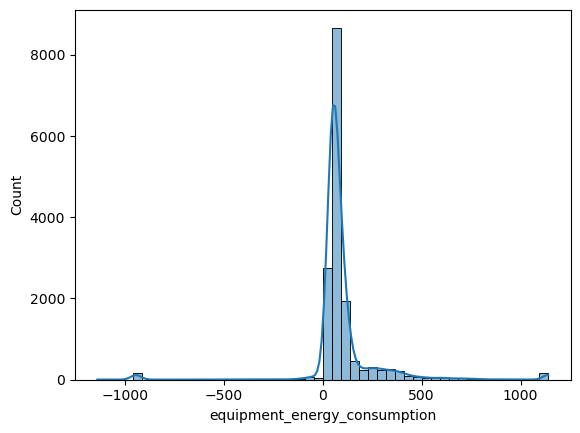

In [33]:
import seaborn as sns
sns.histplot(cleaned_data_frame1['equipment_energy_consumption'].dropna(), bins=50, kde=True)


In [34]:
len(cleaned_data_frame1[cleaned_data_frame1['equipment_energy_consumption'] < 0]) * 100/len(cleaned_data_frame1)

1.8702722020370481

In [40]:
cleaned_data_frame2 = cleaned_data_frame1[(cleaned_data_frame1['equipment_energy_consumption'] >= 0) | (cleaned_data_frame1['equipment_energy_consumption'].isna())].copy()


In [41]:
len(cleaned_data_frame2)

16475

<Axes: xlabel='equipment_energy_consumption', ylabel='Count'>

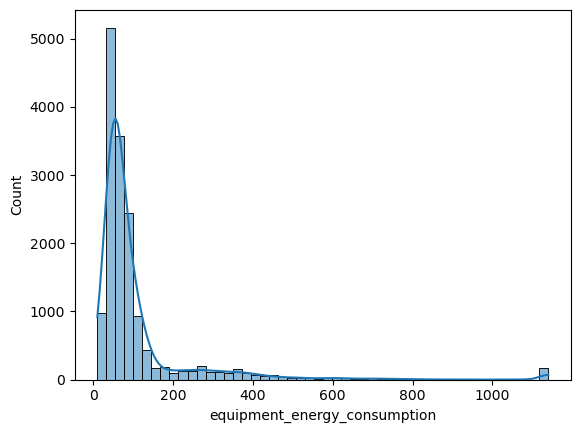

In [42]:
sns.histplot(cleaned_data_frame2['equipment_energy_consumption'].dropna(), bins=50, kde=True)


In [43]:
median_val = cleaned_data_frame2['equipment_energy_consumption'].median()
print(f"The median equipment energy consumption is  {median_val} Wh")


The median equipment energy consumption is  60.0 Wh


In [44]:
cleaned_data_frame2['equipment_energy_consumption'] = cleaned_data_frame2['equipment_energy_consumption'].fillna(median_val)


In [45]:
len(cleaned_data_frame2)

16475

In [ ]:
df.isna().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [91]:
total_rows = len(df)
missing_percentage = df.isna().sum() * 100 / total_rows

In [90]:
missing_percentage

timestamp                       0.000000
equipment_energy_consumption    5.006822
lighting_energy                 4.799193
zone1_temperature               5.143264
zone1_humidity                  4.751735
zone2_temperature               5.060212
zone2_humidity                  5.143264
zone3_temperature               4.757667
zone3_humidity                  5.208519
zone4_temperature               4.840719
zone4_humidity                  4.633090
zone5_temperature               4.971229
zone5_humidity                  4.751735
zone6_temperature               5.030551
zone6_humidity                  5.024619
zone7_temperature               4.710209
zone7_humidity                  4.775464
zone8_temperature               5.030551
zone8_humidity                  4.609361
zone9_temperature               4.585632
zone9_humidity                  5.267841
outdoor_temperature             4.781396
atmospheric_pressure            4.994958
outdoor_humidity                4.739871
wind_speed      

In [47]:
cleaned_data_frame2.isna().sum()

timestamp                         0
equipment_energy_consumption      0
lighting_energy                 790
zone1_temperature               849
zone1_humidity                  781
zone2_temperature               832
zone2_humidity                  843
zone3_temperature               788
zone3_humidity                  862
zone4_temperature               801
zone4_humidity                  761
zone5_temperature               819
zone5_humidity                  782
zone6_temperature               835
zone6_humidity                  827
zone7_temperature               773
zone7_humidity                  792
zone8_temperature               828
zone8_humidity                  759
zone9_temperature               750
zone9_humidity                  868
outdoor_temperature             789
atmospheric_pressure            824
outdoor_humidity                776
wind_speed                      808
visibility_index                792
dew_point                       801
random_variable1            

In [48]:
cleaned_data_frame2.dtypes

timestamp                        object
equipment_energy_consumption    float64
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64
